# ***PREPROCESSING DATA***

---



In [42]:
import pandas as pd

data = pd.read_csv("/content/dataset_tiktok-comments-scraper_2025-05-16_10-36-28-340.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avatarThumbnail    3000 non-null   object 
 1   cid                3000 non-null   int64  
 2   createTime         3000 non-null   int64  
 3   createTimeISO      3000 non-null   object 
 4   diggCount          3000 non-null   int64  
 5   input              3000 non-null   object 
 6   likedByAuthor      3000 non-null   bool   
 7   pinnedByAuthor     3000 non-null   bool   
 8   repliesToId        0 non-null      float64
 9   replyCommentTotal  3000 non-null   int64  
 10  submittedVideoUrl  3000 non-null   object 
 11  text               3000 non-null   object 
 12  uid                3000 non-null   int64  
 13  uniqueId           3000 non-null   object 
 14  videoWebUrl        3000 non-null   object 
dtypes: bool(2), float64(1), int64(5), object(7)
memory usage: 310.7+ KB


,avatarThumbnail,cid,createTime,createTimeISO,diggCount,input,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl
0,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7498246997305623304,1745821695,2025-04-28T06:28:15.000Z,0,https://vt.tiktok.com/ZShQTRhDB/,False,False,NaN,0,https://vt.tiktok.com/ZShQTRhDB/,Good..,7232651038695113730,sn2791ka,https://www.tiktok.com/@tribun.jakarta/video/7...
1,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7497846177674658567,1745728373,2025-04-27T04:32:53.000Z,0,https://vt.tiktok.com/ZShQTRhDB/,False,False,NaN,0,https://vt.tiktok.com/ZShQTRhDB/,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,6956809604064723969,escargot02,https://www.tiktok.com/@tribun.jakarta/video/7...
2,https://p16-common-sign-va.tiktokcdn-us.com/mu...,7497859911238681345,1745731572,2025-04-27T05:26:12.000Z,8,https://vt.tiktok.com/ZShQTRhDB/,False,False,NaN,0,https://vt.tiktok.com/ZShQTRhDB/,kdm is the best,7466765836565513217,tony62785,https://www.tiktok.com/@tribun.jakarta/video/7...
3,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7498023042413970184,1745769542,2025-04-27T15:59:02.000Z,3754,https://vt.tiktok.com/ZShQTRhDB/,False,False,NaN,4,https://vt.tiktok.com/ZShQTRhDB/,pasti kalinya berasa lega bgt😭,7359990986066347014,yu.minji5,https://www.tiktok.com/@tribun.jakarta/video/7...
4,https://p16-common-sign-sg.tiktokcdn-us.com/to...,7496791385140675335,1745482779,2025-04-24T08:19:39.000Z,14543,https://vt.tiktok.com/ZShQTRhDB/,False,False,NaN,113,https://vt.tiktok.com/ZShQTRhDB/,orang puluhan tahun ngumpul duit buat beli tan...,7153117426799248385,zoro15868,https://www.tiktok.com/@tribun.jakarta/video/7...


In [43]:
data["createTimeISO"] = pd.to_datetime(data["createTimeISO"])

data["tanggal"] = data["createTimeISO"].dt.date
data["jam"] = data["createTimeISO"].dt.time

In [44]:
df = pd.DataFrame(data, columns=["tanggal", "jam","uniqueId","diggCount","text"])
df.head()

,tanggal,jam,uniqueId,diggCount,text
0,2025-04-28,06:28:15,sn2791ka,0,Good..
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏
2,2025-04-27,05:26:12,tony62785,8,kdm is the best
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tanggal    3000 non-null   object
 1   jam        3000 non-null   object
 2   uniqueId   3000 non-null   object
 3   diggCount  3000 non-null   int64 
 4   text       3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [46]:
df.drop_duplicates(subset="text", keep = "first", inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2437 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tanggal    2437 non-null   object
 1   jam        2437 non-null   object
 2   uniqueId   2437 non-null   object
 3   diggCount  2437 non-null   int64 
 4   text       2437 non-null   object
dtypes: int64(1), object(4)
memory usage: 114.2+ KB


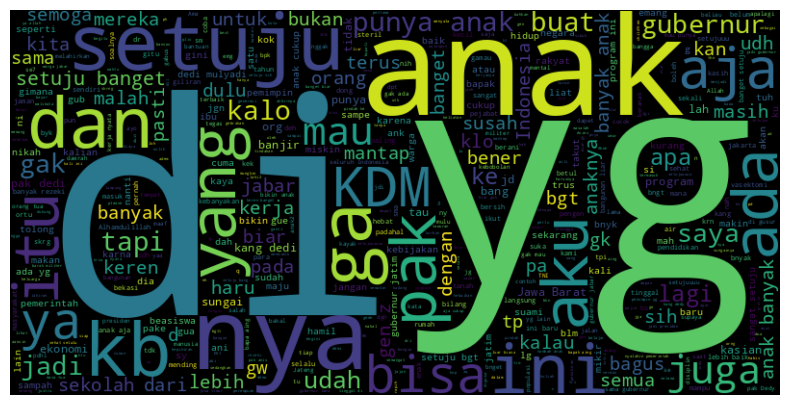

In [48]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['text'] = df['text'].fillna('')

# Menggabungkan teks dari kolom 'text'
text = ' '.join(df['text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

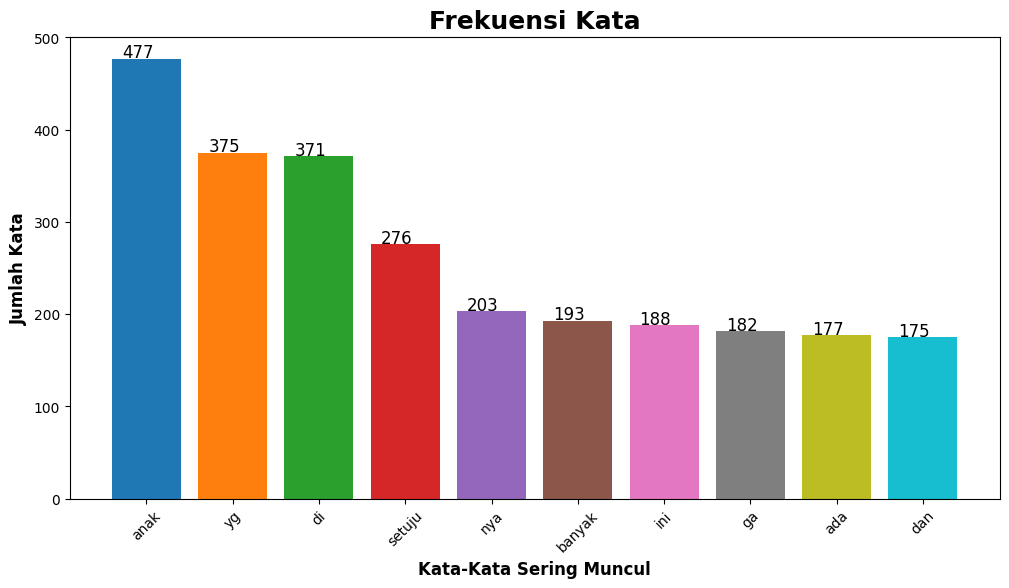

In [49]:
from collections import Counter

text = " ".join(df["text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

In [50]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U00002702-\U000027B0"  # Additional symbols
            u"\U000024C2-\U0001F251"  # Enclosed characters
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d+', '', tweet)
    return tweet

# Terapkan semua fungsi pembersihan pada kolom 'text'
df['cleaning'] = df['text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head()

,tanggal,jam,uniqueId,diggCount,text,cleaning
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...


In [51]:
def case_folding(tweet):
    if isinstance(tweet, str):
        lowercase_tweet = tweet.lower()
        return lowercase_tweet
    else:
        return tweet

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head()

,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...


In [52]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append('<karakter eksplisit>')
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)

    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [53]:
data = pd.DataFrame(df, columns=["tanggal", "jam","uniqueId","diggCount","text","cleaning","case_folding"])
data.head()

,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...


In [54]:
kamus_data = pd.read_excel('/content/kamuskatabaku.xlsx')
kamus_kata_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [55]:
data["normalisasi"], data["Kata_Baku"], data["Kata_Tidak_Baku"], data["Kata_Tidak_Baku_Hash"] = zip(*data["case_folding"].apply(lambda x: replace_taboo_words(x, kamus_kata_tidak_baku)))

df = pd.DataFrame(data, columns=["tanggal", "jam","uniqueId","diggCount","text","cleaning","case_folding","normalisasi"])
df.head(10)

,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding,normalisasi
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good,good
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden,kang deni the next presiden
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best,kdm is the best
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt,pasti kalinya berasa lega banget
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...
5,2025-03-26,04:44:05,aden12927,5219,ini lah hasil kerja nyata bukan omon omon..,ini lah hasil kerja nyata bukan omon omon,ini lah hasil kerja nyata bukan omon omon,ini lah hasil kerja nyata bukan omon omon
6,2025-04-29,06:02:09,cheelllyourfav,455,bayangin pejabat se-Indonesia kerjanya berfung...,bayangin pejabat seIndonesia kerjanya berfungs...,bayangin pejabat seindonesia kerjanya berfungs...,bayangkan pejabat seindonesia kerjanya berfung...
7,2025-03-26,11:54:52,drakipr,14491,segampang itu ya klo pemimpinnya bener,segampang itu ya klo pemimpinnya bener,segampang itu ya klo pemimpinnya bener,segampang itu ya kalau pemimpinnya benar
8,2025-04-26,08:58:53,hiburantiktok.3,1418,kalo banjir bilang pemerintahnya g becus. gili...,kalo banjir bilang pemerintahnya g becus gilir...,kalo banjir bilang pemerintahnya g becus gilir...,kalau banjir bilang pemerintahnya tidak becus ...
9,2025-04-27,12:34:14,nunahanuna,1453,bukan gak empati tapi orang laen mati2an kerja...,bukan gak empati tapi orang laen matian kerja ...,bukan gak empati tapi orang laen matian kerja ...,bukan tidak empati tapi orang lain matian kerj...


In [56]:
def tokenize(text):
    tokens = text.split()
    return tokens

df["tokenize"] = df["normalisasi"].apply(tokenize)

df.head()

,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding,normalisasi,tokenize
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good,good,[good]
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden,kang deni the next presiden,"[kang, deni, the, next, presiden]"
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best,kdm is the best,"[kdm, is, the, best]"
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt,pasti kalinya berasa lega banget,"[pasti, kalinya, berasa, lega, banget]"
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,"[orang, puluhan, tahun, ngumpul, duit, buat, b..."


In [57]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df["stopword removal"] = df["tokenize"].apply(lambda x: remove_stopwords(x))

df.head(10)

,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good,good,[good],[good]
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden,kang deni the next presiden,"[kang, deni, the, next, presiden]","[kang, deni, the, next, presiden]"
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best,kdm is the best,"[kdm, is, the, best]","[kdm, is, the, best]"
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt,pasti kalinya berasa lega banget,"[pasti, kalinya, berasa, lega, banget]","[kalinya, berasa, lega, banget]"
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,"[orang, puluhan, tahun, ngumpul, duit, buat, b...","[orang, puluhan, ngumpul, duit, beli, tanahter..."
5,2025-03-26,04:44:05,aden12927,5219,ini lah hasil kerja nyata bukan omon omon..,ini lah hasil kerja nyata bukan omon omon,ini lah hasil kerja nyata bukan omon omon,ini lah hasil kerja nyata bukan omon omon,"[ini, lah, hasil, kerja, nyata, bukan, omon, o...","[hasil, kerja, nyata, omon, omon]"
6,2025-04-29,06:02:09,cheelllyourfav,455,bayangin pejabat se-Indonesia kerjanya berfung...,bayangin pejabat seIndonesia kerjanya berfungs...,bayangin pejabat seindonesia kerjanya berfungs...,bayangkan pejabat seindonesia kerjanya berfung...,"[bayangkan, pejabat, seindonesia, kerjanya, be...","[bayangkan, pejabat, seindonesia, kerjanya, be..."
7,2025-03-26,11:54:52,drakipr,14491,segampang itu ya klo pemimpinnya bener,segampang itu ya klo pemimpinnya bener,segampang itu ya klo pemimpinnya bener,segampang itu ya kalau pemimpinnya benar,"[segampang, itu, ya, kalau, pemimpinnya, benar]","[segampang, ya, pemimpinnya]"
8,2025-04-26,08:58:53,hiburantiktok.3,1418,kalo banjir bilang pemerintahnya g becus. gili...,kalo banjir bilang pemerintahnya g becus gilir...,kalo banjir bilang pemerintahnya g becus gilir...,kalau banjir bilang pemerintahnya tidak becus ...,"[kalau, banjir, bilang, pemerintahnya, tidak, ...","[banjir, bilang, pemerintahnya, becus, giliran..."
9,2025-04-27,12:34:14,nunahanuna,1453,bukan gak empati tapi orang laen mati2an kerja...,bukan gak empati tapi orang laen matian kerja ...,bukan gak empati tapi orang laen matian kerja ...,bukan tidak empati tapi orang lain matian kerj...,"[bukan, tidak, empati, tapi, orang, lain, mati...","[empati, orang, matian, kerja, cari, duit, ngo..."


In [59]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [60]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df["stemming_data"] = df["stopword removal"].apply(lambda x: " ".join(stem_text(x)))

df.head()

,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good,good,[good],[good],good
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden,kang deni the next presiden,"[kang, deni, the, next, presiden]","[kang, deni, the, next, presiden]",kang den the next presiden
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best,kdm is the best,"[kdm, is, the, best]","[kdm, is, the, best]",kdm is the best
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt,pasti kalinya berasa lega banget,"[pasti, kalinya, berasa, lega, banget]","[kalinya, berasa, lega, banget]",kali asa lega banget
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,"[orang, puluhan, tahun, ngumpul, duit, buat, b...","[orang, puluhan, ngumpul, duit, beli, tanahter...",orang puluh ngumpul duit beli tanahterus bangu...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2437 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           2437 non-null   object
 1   jam               2437 non-null   object
 2   uniqueId          2437 non-null   object
 3   diggCount         2437 non-null   int64 
 4   text              2437 non-null   object
 5   cleaning          2437 non-null   object
 6   case_folding      2437 non-null   object
 7   normalisasi       2437 non-null   object
 8   tokenize          2437 non-null   object
 9   stopword removal  2437 non-null   object
 10  stemming_data     2437 non-null   object
dtypes: int64(1), object(10)
memory usage: 293.0+ KB


In [62]:
df.to_csv("Hasil_Preprocessing_Data.csv", encoding = "utf8", index = False);

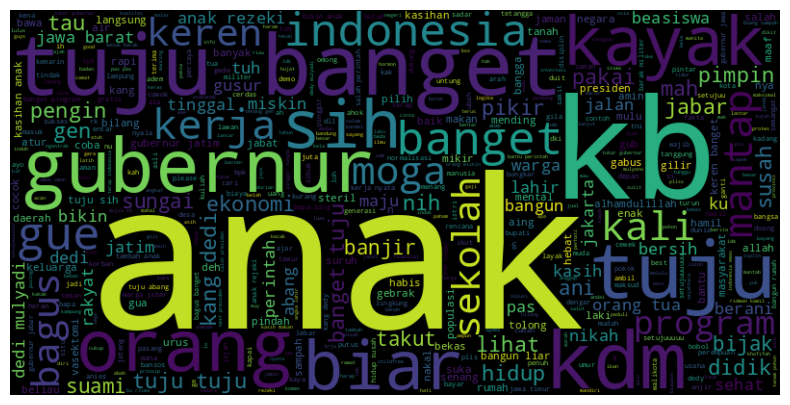

In [65]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt

# # Mengisi nilai NaN dengan string kosong ('')
# df['text'] = df['text'].fillna('')

# Menggabungkan teks dari kolom 'text'
text = ' '.join(df['stemming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

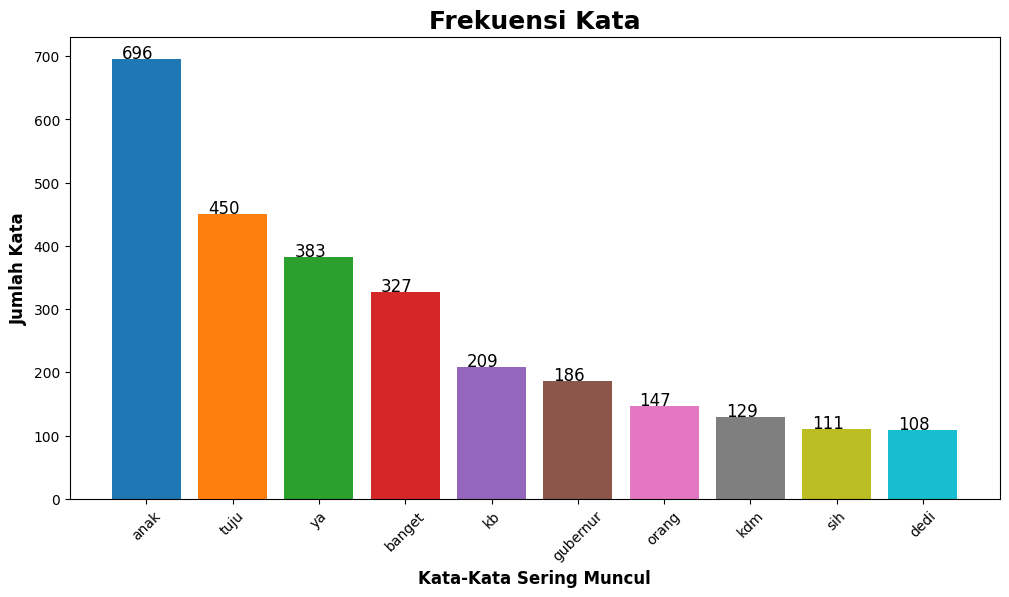

In [66]:
from collections import Counter

text = " ".join(df["stemming_data"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

# ***LABELING DATA***

---

In [77]:
import pandas as pd

data = pd.read_csv("/content/Hasil_Preprocessing_Data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           2437 non-null   object
 1   jam               2437 non-null   object
 2   uniqueId          2437 non-null   object
 3   diggCount         2437 non-null   int64 
 4   text              2437 non-null   object
 5   cleaning          2342 non-null   object
 6   case_folding      2342 non-null   object
 7   normalisasi       2340 non-null   object
 8   tokenize          2437 non-null   object
 9   stopword removal  2437 non-null   object
 10  stemming_data     2326 non-null   object
dtypes: int64(1), object(10)
memory usage: 209.6+ KB


,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good,good,['good'],['good'],good
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden,kang deni the next presiden,"['kang', 'deni', 'the', 'next', 'presiden']","['kang', 'deni', 'the', 'next', 'presiden']",kang den the next presiden
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best,kdm is the best,"['kdm', 'is', 'the', 'best']","['kdm', 'is', 'the', 'best']",kdm is the best
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt,pasti kalinya berasa lega banget,"['pasti', 'kalinya', 'berasa', 'lega', 'banget']","['kalinya', 'berasa', 'lega', 'banget']",kali asa lega banget
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,"['orang', 'puluhan', 'tahun', 'ngumpul', 'duit...","['orang', 'puluhan', 'ngumpul', 'duit', 'beli'...",orang puluh ngumpul duit beli tanahterus bangu...


In [78]:
df = data.dropna()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2326 entries, 0 to 2436
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           2326 non-null   object
 1   jam               2326 non-null   object
 2   uniqueId          2326 non-null   object
 3   diggCount         2326 non-null   int64 
 4   text              2326 non-null   object
 5   cleaning          2326 non-null   object
 6   case_folding      2326 non-null   object
 7   normalisasi       2326 non-null   object
 8   tokenize          2326 non-null   object
 9   stopword removal  2326 non-null   object
 10  stemming_data     2326 non-null   object
dtypes: int64(1), object(10)
memory usage: 218.1+ KB


In [88]:
import pandas as pd

# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)

    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"
    else:
        return "Netral"  # Jika jumlah sama atau keduanya 0

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

# Fungsi untuk mengganti nilai None dengan label bergantian
def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments

# Menerapkan ke DataFrame
df["Sentiment"] = df["stemming_data"].apply(determine_sentiment)
df["Sentiment"] = replace_none_sentiment(df["Sentiment"].tolist())

df.head()


<ipython-input-88-a2ed350cf644>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"] = df["stemming_data"].apply(determine_sentiment)
<ipython-input-88-a2ed350cf644>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"] = replace_none_sentiment(df["Sentiment"].tolist())


,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data,Sentiment
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good,good,['good'],['good'],good,Positif
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden,kang deni the next presiden,"['kang', 'deni', 'the', 'next', 'presiden']","['kang', 'deni', 'the', 'next', 'presiden']",kang den the next presiden,Netral
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best,kdm is the best,"['kdm', 'is', 'the', 'best']","['kdm', 'is', 'the', 'best']",kdm is the best,Netral
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt,pasti kalinya berasa lega banget,"['pasti', 'kalinya', 'berasa', 'lega', 'banget']","['kalinya', 'berasa', 'lega', 'banget']",kali asa lega banget,Positif
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,"['orang', 'puluhan', 'tahun', 'ngumpul', 'duit...","['orang', 'puluhan', 'ngumpul', 'duit', 'beli'...",orang puluh ngumpul duit beli tanahterus bangu...,Negatif


<ipython-input-89-591702e1ef76>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


<function matplotlib.pyplot.show(close=None, block=None)>

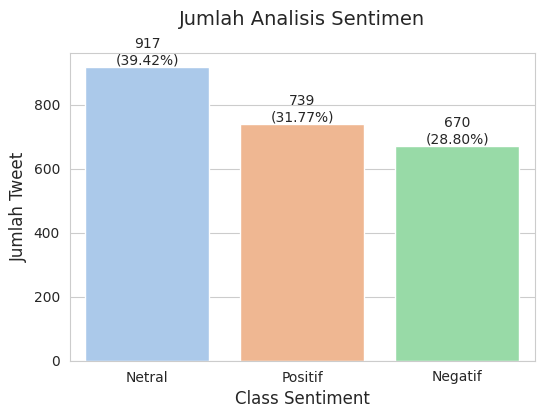

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah masing-masing sentimen
sentiment_count = df['Sentiment'].value_counts()
sns.set_style('whitegrid')

# Buat plot
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

# Tambahkan persentase ke atas bar
total = len(df['Sentiment'])
for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show


In [90]:
df.to_csv("Hasil_Labeling_Data.csv", encoding="utf8", index=False)

# ***MODEL ALGORITMA SVM***

---



In [91]:
import pandas as pd

data = pd.read_csv("Hasil_Labeling_Data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           2326 non-null   object
 1   jam               2326 non-null   object
 2   uniqueId          2326 non-null   object
 3   diggCount         2326 non-null   int64 
 4   text              2326 non-null   object
 5   cleaning          2326 non-null   object
 6   case_folding      2326 non-null   object
 7   normalisasi       2326 non-null   object
 8   tokenize          2326 non-null   object
 9   stopword removal  2326 non-null   object
 10  stemming_data     2326 non-null   object
 11  Sentiment         2326 non-null   object
dtypes: int64(1), object(11)
memory usage: 218.2+ KB


,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data,Sentiment
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good,good,['good'],['good'],good,Positif
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden,kang deni the next presiden,"['kang', 'deni', 'the', 'next', 'presiden']","['kang', 'deni', 'the', 'next', 'presiden']",kang den the next presiden,Netral
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best,kdm is the best,"['kdm', 'is', 'the', 'best']","['kdm', 'is', 'the', 'best']",kdm is the best,Netral
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt,pasti kalinya berasa lega banget,"['pasti', 'kalinya', 'berasa', 'lega', 'banget']","['kalinya', 'berasa', 'lega', 'banget']",kali asa lega banget,Positif
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,"['orang', 'puluhan', 'tahun', 'ngumpul', 'duit...","['orang', 'puluhan', 'ngumpul', 'duit', 'beli'...",orang puluh ngumpul duit beli tanahterus bangu...,Negatif


In [92]:
df = data.dropna()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           2326 non-null   object
 1   jam               2326 non-null   object
 2   uniqueId          2326 non-null   object
 3   diggCount         2326 non-null   int64 
 4   text              2326 non-null   object
 5   cleaning          2326 non-null   object
 6   case_folding      2326 non-null   object
 7   normalisasi       2326 non-null   object
 8   tokenize          2326 non-null   object
 9   stopword removal  2326 non-null   object
 10  stemming_data     2326 non-null   object
 11  Sentiment         2326 non-null   object
dtypes: int64(1), object(11)
memory usage: 218.2+ KB


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df["stemming_data"], df["Sentiment"], test_size=0.2, random_state=42)

In [96]:
train_set = pd.DataFrame({"text": X_train, "sentiment": y_train})
test_set = pd.DataFrame({"text": X_test, "sentiment": y_test})

train_set.to_csv("train_data.csv", index=False)
test_set.to_csv("test_data.csv", index=False)

In [97]:
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 1860
Jumlah data uji: 466


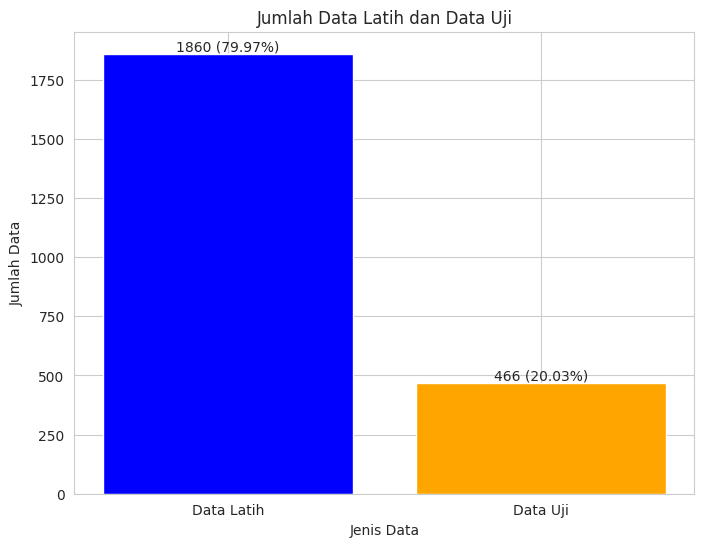

In [98]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7,
             f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


In [100]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [102]:
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())


print("\nSebagian dari Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[:5, :].toarray())

Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian dari Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [103]:
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [104]:
y_pred_svm = svm.predict(X_test_vectorized)

In [105]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix SVM:")
print(cm_svm)

Confusion Matrix SVM:
[[101  21   8]
 [ 18 143  25]
 [  5  20 125]]


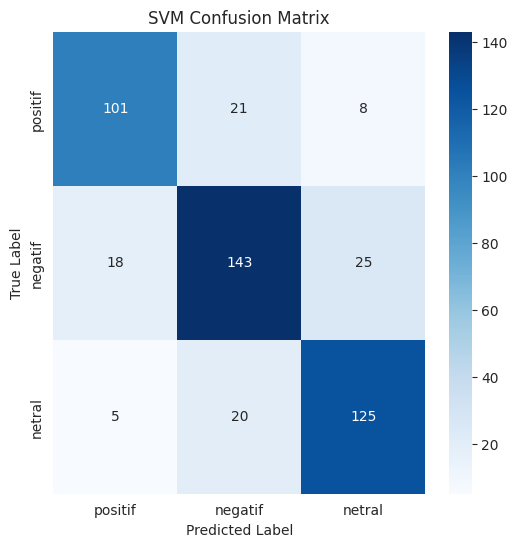

In [106]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['positif', 'negatif', 'netral'],
                yticklabels=['positif', 'negatif', 'netral'])

    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix("SVM", y_test, y_pred_svm)


In [107]:
# Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("")

accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy:", "{:.2f}%".format(accuracy_svm_percentage))
print("")

# Menampilkan classification report untuk SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7918454935622318

SVM Accuracy: 79.18%

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.81      0.78      0.80       130
      Netral       0.78      0.77      0.77       186
     Positif       0.79      0.83      0.81       150

    accuracy                           0.79       466
   macro avg       0.79      0.79      0.79       466
weighted avg       0.79      0.79      0.79       466



# ***WORDCLOUD***

---



In [108]:
import pandas as pd

data = pd.read_csv("/content/Hasil_Labeling_Data.csv")
data.head()

,tanggal,jam,uniqueId,diggCount,text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data,Sentiment
0,2025-04-28,06:28:15,sn2791ka,0,Good..,Good,good,good,['good'],['good'],good,Positif
1,2025-04-27,04:32:53,escargot02,0,Kang Deni the next Presiden🥰🥰🥰👍👍🙏🙏🙏,Kang Deni the next Presiden,kang deni the next presiden,kang deni the next presiden,"['kang', 'deni', 'the', 'next', 'presiden']","['kang', 'deni', 'the', 'next', 'presiden']",kang den the next presiden,Netral
2,2025-04-27,05:26:12,tony62785,8,kdm is the best,kdm is the best,kdm is the best,kdm is the best,"['kdm', 'is', 'the', 'best']","['kdm', 'is', 'the', 'best']",kdm is the best,Netral
3,2025-04-27,15:59:02,yu.minji5,3754,pasti kalinya berasa lega bgt😭,pasti kalinya berasa lega bgt,pasti kalinya berasa lega bgt,pasti kalinya berasa lega banget,"['pasti', 'kalinya', 'berasa', 'lega', 'banget']","['kalinya', 'berasa', 'lega', 'banget']",kali asa lega banget,Positif
4,2025-04-24,08:19:39,zoro15868,14543,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,orang puluhan tahun ngumpul duit buat beli tan...,"['orang', 'puluhan', 'tahun', 'ngumpul', 'duit...","['orang', 'puluhan', 'ngumpul', 'duit', 'beli'...",orang puluh ngumpul duit beli tanahterus bangu...,Negatif


In [110]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif']['stemming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif']['stemming_data'].str.cat(sep=' ')
sentimen_netral  = data[data['Sentiment'] == 'Netral']['stemming_data'].str.cat(sep=' ')

# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

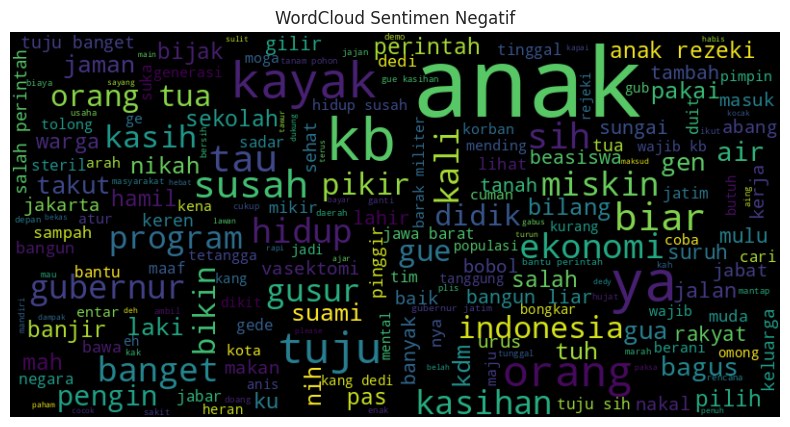

In [111]:
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

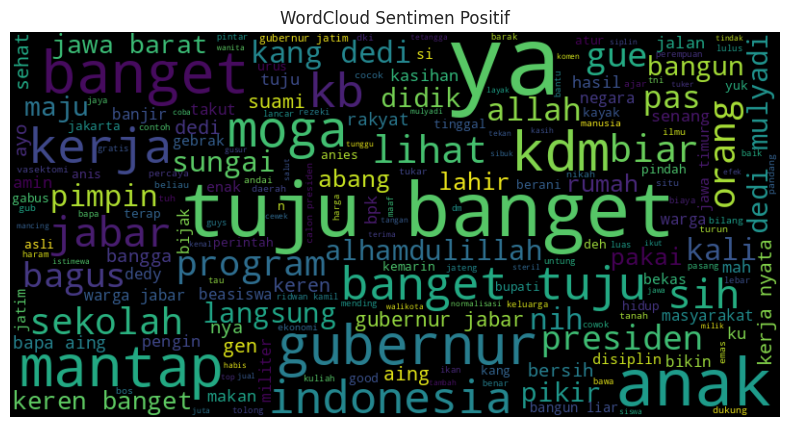

In [112]:
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

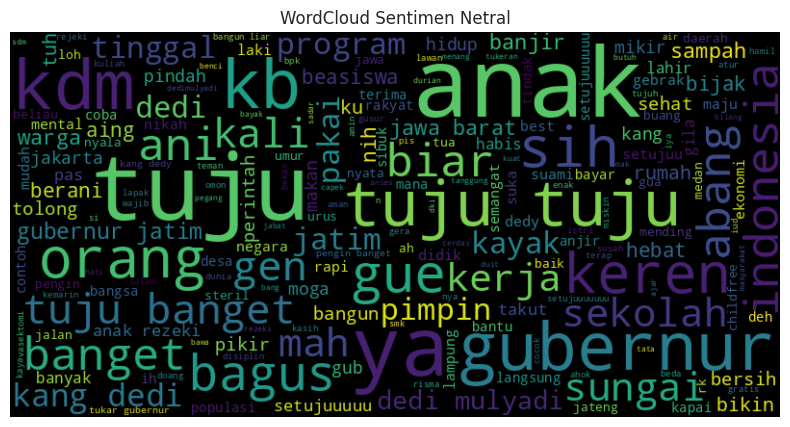

In [113]:
create_wordcloud(sentimen_netral, 'WordCloud Sentimen Netral')

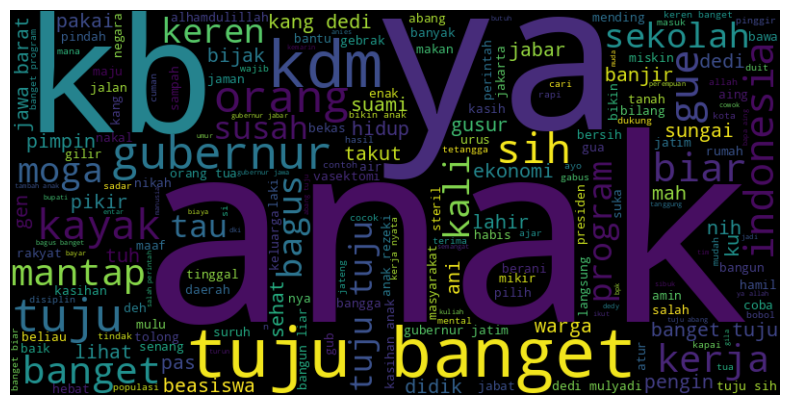

In [115]:
text = ' '.join(data['stemming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()